In [ ]:

import os
import pandas as pd

data_path = os.path.join("..", "data", "Nifty50_Train.csv")
df = pd.read_csv(data_path)


In [ ]:
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)


Checking for stationarity

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['Close'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: 0.7320739653054207
p-value: 0.9904566986894129


since the p value > 0.05 we accept null hypothesis so the data is non stationary

Making data stationary using differencing technique

In [ ]:
df['Differenced_Close'] = df['Close'].diff().dropna()

In [ ]:
df["Differenced_Close"] = df["Differenced_Close"]

In [ ]:
df["Differenced_Close"]

,Differenced_Close
Date,
2014-12-01,NaN
2014-12-02,-31.200195
2014-12-03,12.950195
2014-12-04,26.750000
2014-12-05,-26.100586
...,...
2024-11-25,314.650391
2024-11-26,-27.400391
2024-11-27,80.400391


difference =Current Close − Previous Close

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['Differenced_Close'].dropna())  # drop any NaN values
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -20.654820738390104
p-value: 0.0


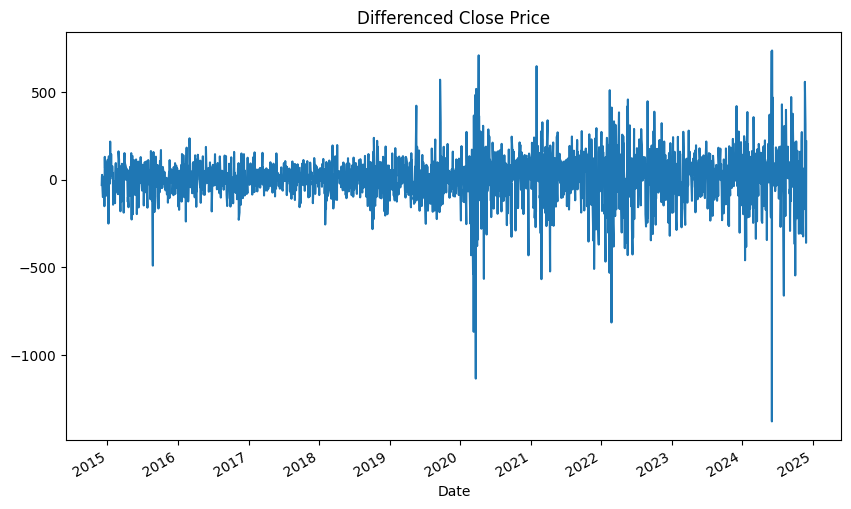

In [ ]:
import matplotlib.pyplot as plt

df['Differenced_Close'].plot(figsize=(10,6))
plt.title('Differenced Close Price')
plt.show()


now the data  is stationary


In [ ]:

# Calculate percentage change (returns)
df['returns'] = df['Close'].pct_change().dropna()


pct_change= (Current Close − Previous Close)/ Previous Close
​



In [ ]:

df["returns"]

,returns
Date,
2014-12-01,NaN
2014-12-02,-0.003647
2014-12-03,0.001519
2014-12-04,0.003133
2014-12-05,-0.003048
...,...
2024-11-25,0.013161
2024-11-26,-0.001131
2024-11-27,0.003323


<Axes: xlabel='Date'>

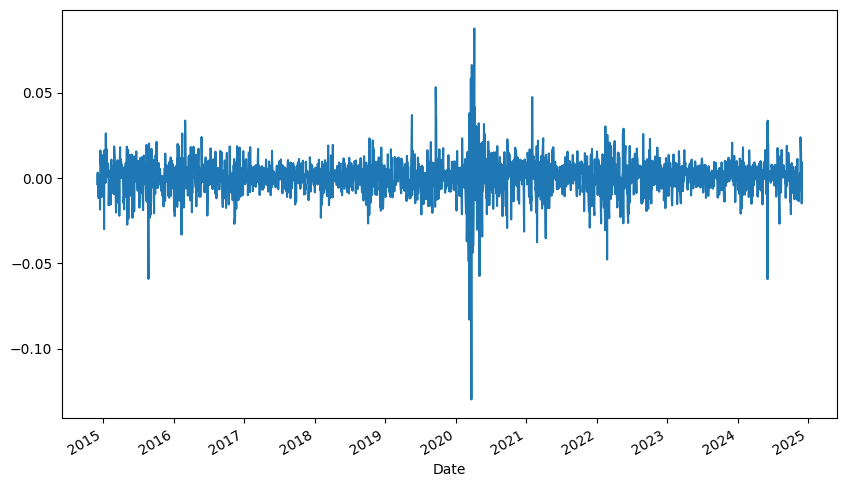

In [ ]:
df['returns'].plot(figsize=(10,6))


In [ ]:
import numpy as np
print(df['returns'].isnull().sum())  # Check for NaNs
print(np.isinf(df['returns']).sum())  # Check for infinities


1
0


In [ ]:
from statsmodels.tsa.stattools import adfuller
import numpy as np

# Test for stationarity using ADF test
adf_result = adfuller(df['returns'].dropna())
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")

ADF Statistic: -13.814602560619402
p-value: 8.112703457893047e-26


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt


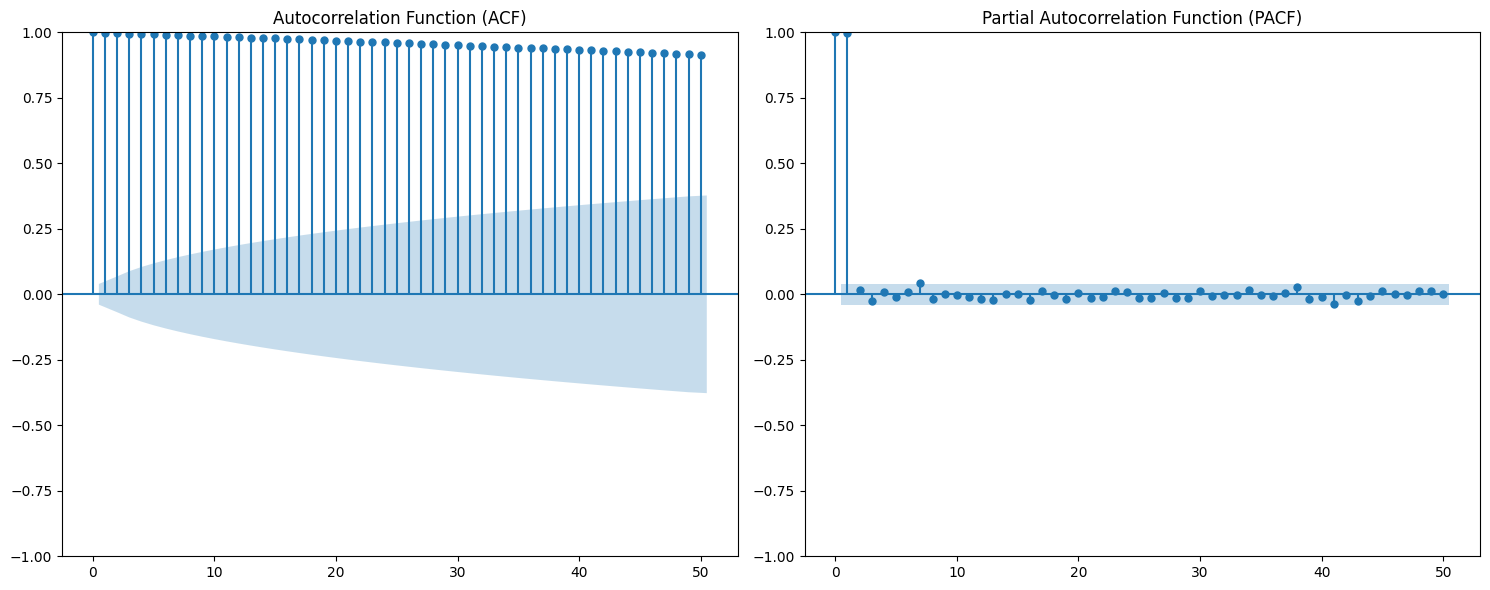

In [ ]:
# Create the figure and axis
plt.figure(figsize=(15, 6))

# Plot the ACF
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plot_acf(df['Close'], lags=50, ax=plt.gca())  # Use plt.gca() to direct plot to current axis
plt.title('Autocorrelation Function (ACF)')

# Plot the PACF
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plot_pacf(df['Close'], lags=50, ax=plt.gca())  # Use plt.gca() for the current axis
plt.title('Partial Autocorrelation Function (PACF)')

# Show the plot
plt.tight_layout()  # Adjust the layout
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt


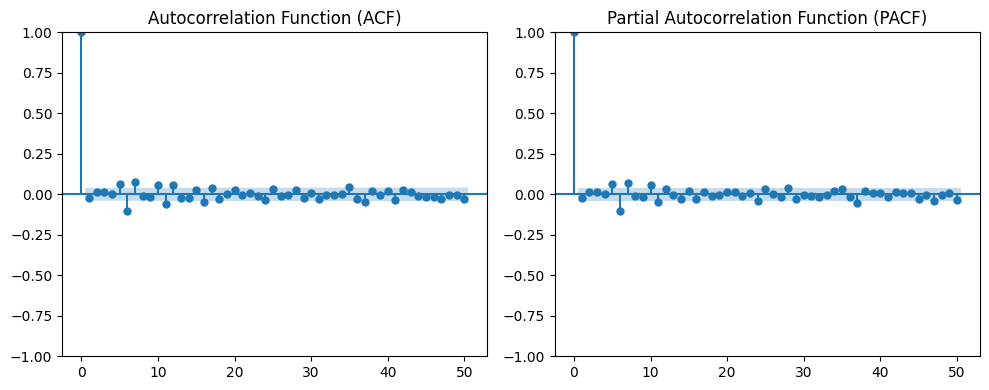

In [ ]:
# Create the figure and axis
plt.figure(figsize=(10, 4))

# Plot the ACF
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plot_acf(df['returns'].dropna(), lags=50, ax=plt.gca())  # Use plt.gca() to direct plot to current axis
plt.title('Autocorrelation Function (ACF)')

# Plot the PACF
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plot_pacf(df['returns'].dropna(), lags=50, ax=plt.gca())  # Use plt.gca() for the current axis
plt.title('Partial Autocorrelation Function (PACF)')

# Show the plot
plt.tight_layout()  # Adjust the layout
plt.show()

ACF plot checks how current values relate to past values at various lags, while the PACF plot shows the direct influence of specific lagged terms, helping determine the number of autoregressive (AR) terms.

In this case, both the ACF and PACF plots show a significant spike at lag 1, which indicates that the current value of the series is directly influenced by the previous time step (yesterday’s value). The ACF plot shows that there is significant autocorrelation at lag 1, suggesting that moving average (MA) terms could play a role in the model. The PACF plot also shows a significant spike at lag 1, indicating that an AR(1) model (autoregressive model with 1 lag) is appropriate, as today's value is influenced by yesterday's value.  

The ACF and PACF plots both show a significant spike at lag 1, indicating that the current value of the series is directly influenced by the previous time step (yesterday's value). The ACF plot suggests that there is a notable autocorrelation at lag 1, pointing to the potential importance of the moving average (MA) term, specifically MA(1), as it captures the impact of past forecast errors. Meanwhile, the PACF plot's spike at lag 1 highlights the presence of a direct autoregressive (AR) relationship with the previous value, suggesting that an AR(1) term is appropriate. These insights indicate that an ARIMA model with parameters p = 1, d = 0 or 1 (depending on stationarity), and q = 1 is suitable for the data, with the AR(1) term capturing the influence of the previous value and the MA(1) term accounting for the past forecast error.

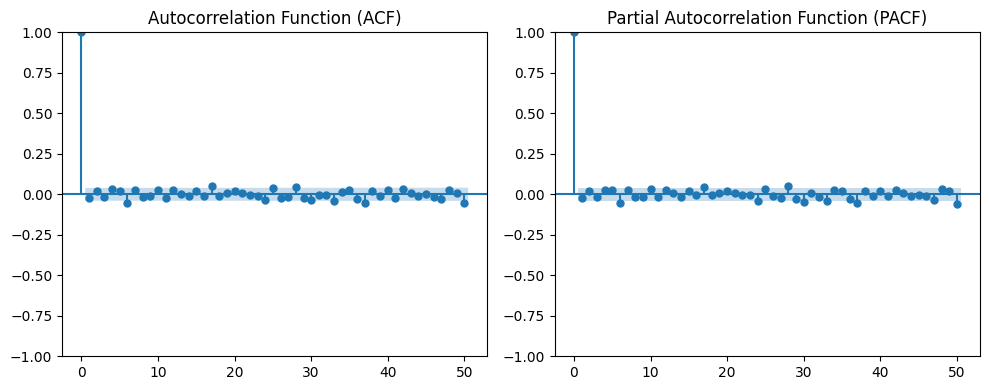

In [ ]:
# Create the figure and axis
plt.figure(figsize=(10, 4))

# Plot the ACF
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plot_acf(df['Differenced_Close'].dropna(), lags=50, ax=plt.gca())  # Use plt.gca() to direct plot to current axis
plt.title('Autocorrelation Function (ACF)')

# Plot the PACF
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plot_pacf(df['Differenced_Close'].dropna(), lags=50, ax=plt.gca())  # Use plt.gca() for the current axis
plt.title('Partial Autocorrelation Function (PACF)')

# Show the plot
plt.tight_layout()  # Adjust the layout
plt.show()

This ACF and PACF plot indicates that after applying differencing, the data has become stationary, as shown by a significant spike at Lag 1 in both ACF and PACF, with no notable correlations beyond that. The differencing was applied to remove the trend in the data and stabilize its mean, which is why d = 1 is used in the ARIMA model. The spike at Lag 1 in the ACF suggests a significant autocorrelation, indicating that the moving average (MA) component is important at this lag, while the PACF plot confirms a strong autoregressive relationship at Lag 1. Since there are no significant correlations beyond Lag 1, this suggests that the AR(1) and MA(1) components are sufficient to capture the dependencies in the data. Therefore, an ARIMA(1, 1, 1) model is the most appropriate for this data, with p = 1, d = 1, and q = 1, capturing both autoregressive and moving average effects.

In [ ]:
df.columns


Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Differenced_Close', 'returns'],
      dtype='object')

AR(Auto Regression Model) Using Difference_Close column

In [ ]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg

# Assuming your dataframe is named df and 'Differenced_Close' is the column we want to predict
differenced_close = df['Differenced_Close'].dropna()  # The stationary data for the model
dates = df.index[1:]  # Use the index for dates as it's now set as datetime

# Step 2: Fit the AR(1) Model
model_diff = AutoReg(differenced_close, lags=1)
ar_model_diff = model_diff.fit()

# Step 4: Check the results
print(ar_model_diff.summary())  # View model summary and coefficients








                            AutoReg Model Results                             
Dep. Variable:      Differenced_Close   No. Observations:                 2459
Model:                     AutoReg(1)   Log Likelihood              -15545.122
Method:               Conditional MLE   S.D. of innovations            135.011
Date:                Wed, 05 Feb 2025   AIC                          31096.245
Time:                        04:38:52   BIC                          31113.666
Sample:                             1   HQIC                         31102.575
                                 2459                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    6.4841      2.726      2.378      0.017       1.141      11.827
Differenced_Close.L1    -0.0216      0.020     -1.070      0.285      -0.061       0.018
            

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
# Step 3: Make predictions
forecast_steps = 10
predictions_diff = ar_model_diff.predict(start=len(differenced_close), end=len(differenced_close) + forecast_steps - 1)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


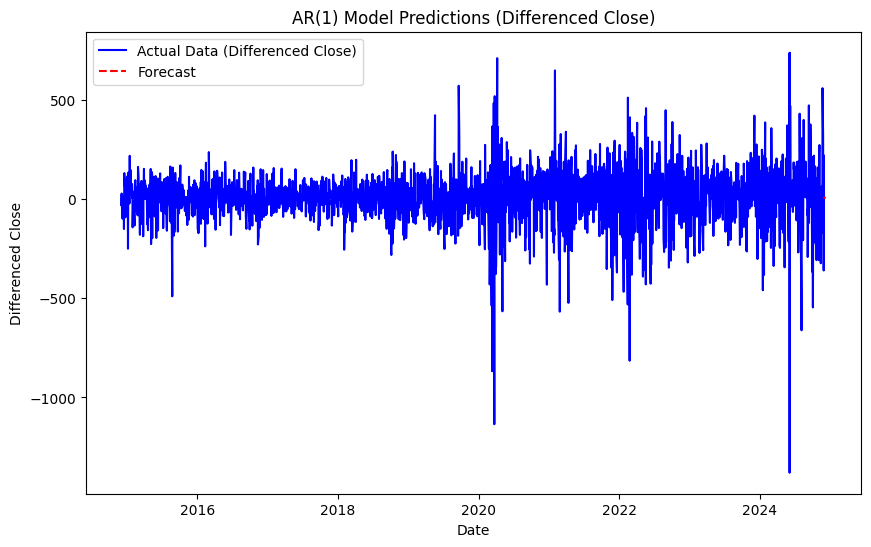

In [ ]:
# Step 4: Prepare for visualization
forecast_dates = pd.date_range(start=dates[-1], periods=forecast_steps + 1, freq='D')[1:]  # Get forecasted dates

# Step 5: Visualize the predictions
plt.figure(figsize=(10, 6))
plt.plot(dates, differenced_close, label='Actual Data (Differenced Close)', color='blue')
plt.plot(forecast_dates, predictions_diff, label='Forecast', color='red', linestyle='--')
plt.legend(loc='best')
plt.title('AR(1) Model Predictions (Differenced Close)')
plt.xlabel('Date')
plt.ylabel('Differenced Close')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming `test_data_diff` is your actual differenced test data
# Replace the placeholder with actual test data
test_data_diff = np.random.randn(10)  # Replace with actual test data

# Ensure predictions and test data are of the same length
predictions_for_eval = predictions_diff[:len(test_data_diff)]

# Function to calculate RMSE
def rmse(actual, predicted):
    return np.sqrt(mean_squared_error(actual, predicted))

# Calculate RMSE
rmse_value_diff = rmse(test_data_diff, predictions_for_eval)
print(f"RMSE for Differenced Close: {rmse_value_diff:.2f}")


RMSE for Differenced Close: 6.03


In [ ]:
# Optional: Print the forecasted values with dates
for date, prediction in zip(forecast_dates, predictions_diff):
    print(f"Date: {date.date()}, Predicted Differenced Close: {prediction:.2f}")

Date: 2024-11-30, Predicted Differenced Close: 1.80
Date: 2024-12-01, Predicted Differenced Close: 6.45
Date: 2024-12-02, Predicted Differenced Close: 6.34
Date: 2024-12-03, Predicted Differenced Close: 6.35
Date: 2024-12-04, Predicted Differenced Close: 6.35
Date: 2024-12-05, Predicted Differenced Close: 6.35
Date: 2024-12-06, Predicted Differenced Close: 6.35
Date: 2024-12-07, Predicted Differenced Close: 6.35
Date: 2024-12-08, Predicted Differenced Close: 6.35
Date: 2024-12-09, Predicted Differenced Close: 6.35


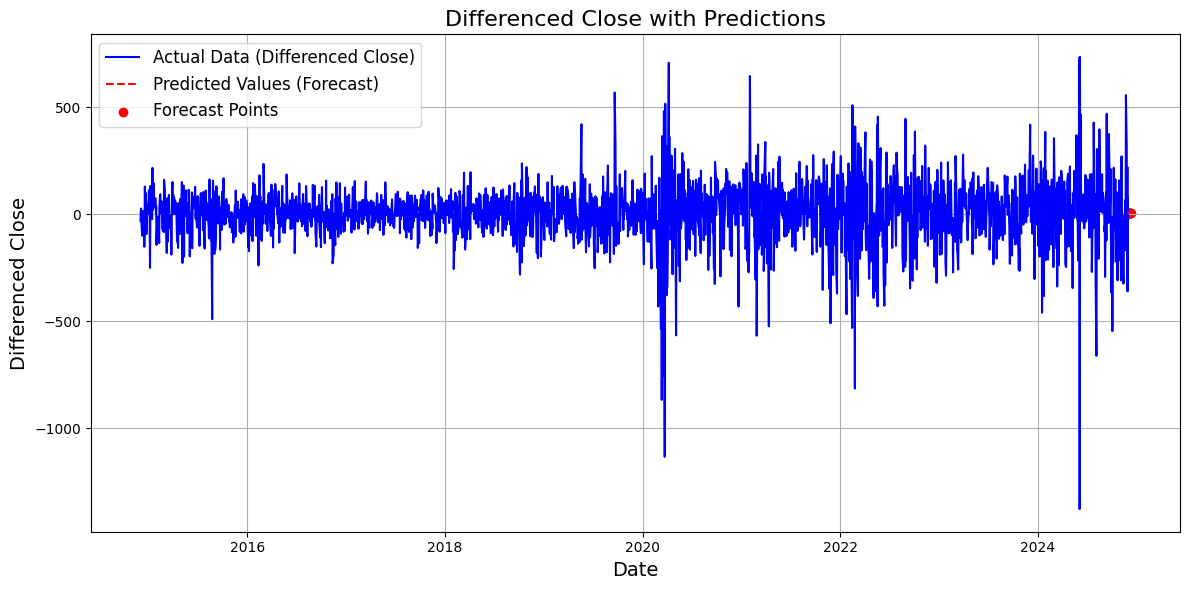

In [ ]:
import matplotlib.pyplot as plt

# Assuming `differenced_close` contains the actual data
# `predictions_diff` contains the predicted values
# `forecast_dates` contains the corresponding future dates for the predictions

# Step 1: Combine dates and data for plotting
combined_dates = np.concatenate([dates, forecast_dates])  # Combine historical and forecast dates
combined_values = np.concatenate([differenced_close, predictions_diff])  # Combine actual and predicted values

# Step 2: Plot the combined data
plt.figure(figsize=(12, 6))
plt.plot(dates, differenced_close, label="Actual Data (Differenced Close)", color="blue")  # Historical data
plt.plot(forecast_dates, predictions_diff, label="Predicted Values (Forecast)", color="red", linestyle="--")  # Predictions
plt.scatter(forecast_dates, predictions_diff, color="red", marker="o", label="Forecast Points")  # Highlight forecast points

# Step 3: Add labels, title, and legend
plt.title("Differenced Close with Predictions", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Differenced Close", fontsize=14)
plt.legend(loc="best", fontsize=12)
plt.grid(True)
plt.tight_layout()

# Step 4: Display the plot
plt.show()
